# FFT Filtering Test
### CS4243

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


In [2]:
# constant coefficient to show the images if necessary

dc=100

In [3]:

# The function takes two dimension inputs for the filter image;
# the third para is D0, which defines the circle area of the LowPass Filter.
# parameters: Image is MxN, D0 is the cutoff freq

def idealLowPass(M, N, D0):
    # Initializing the filter with ones; since the filter is a complex function,
    # it has two channels, representing the real and imaginary parts:
   
    filter = np.ones((M, N), dtype=np.uint8)
    # normalized cut_off frequency is mapped to real index
    D0 = D0 * min(M,N) / 2
    # Scanning through each pixel and calculating the distance of each pixel
    # to the image center. If the pixel is within D0, it is changed to 0:
    for i in range(M):
        for j in range(N):
            if ( (i-M/2)**2 + (j-N/2)**2)**0.5 >= D0:
                filter[i,j]= 0
            
    return filter


In [4]:

# The function takes two dimension inputs for the filter image;
# the third para is D0, which defines the circle area of the LowPass Filter.
def idealHighPass(M, N, D0):
    return 1 - idealLowPass(M, N, D0)


In [5]:
# 
#  
def ButterworthLowPass(M, N, D0, n_o):
    #  
    filter = np.zeros((M, N))
    # normalized cut_off frequency is mapped to real index
    D0 = D0 * min(M,N) / 2
    n_o = 2 * n_o
    for i in range(M):
        for j in range(N):
            d = ( (i-M/2)**2 + (j-N/2)**2 )**0.5
            filter[i,j]= 1 / ( 1 + (d/D0)**n_o )
            
    return filter


In [6]:
# 
#  
def ButterworthHighPass(M, N, D0, n_o):
    #  
    return 1 - ButterworthLowPass(M, N, D0, n_o)


In [7]:
# read the image, 0 means reading as gray level
gray = cv.imread("..\\wm74_2.bmp", 0)

# Fourier transform
# output, img_dft, is a complex matrix of the image size
img_dft = np.fft.fft2(gray)

# we need to employ fftshift to bring the lower frequency components 
# to the centre of the frequency domain
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

print(img_dft.shape , type(img_dft), img_dft[0,0])


(427, 639) <class 'numpy.ndarray'> (37763895+0j)


In [8]:
# filtering 

# finding the filter matrix size
M = gray.shape
# computing absolute or magnitude or power spectrum and phase of the FFT of the image
dft_shift_abs = np.abs(dft_shift)
dft_shift_phase = np.angle(dft_shift) 

# we build a filter, same size of the image and fft
# lowpass filters
#f = ButterworthLowPass(M[0], M[1], 0.8, 1.5) 
f = idealLowPass(M[0], M[1], 0.4)

# if you want highpass filters ....
#f = ButterworthHighPass(M[0], M[1], 0.4, 2) 
#f = idealHighPass(M[0], M[1], 0.4)


# filtering, element wise multiplication
dft_shift_abs = np.multiply(dft_shift_abs,f) 
# building the complext matrix after filtering 
z = np.multiply ( dft_shift_abs , np.exp((1j)*(dft_shift_phase)) )

# fftshift used to re-shift the frequency components to their original place
# and make them ready for inverse fft transform
idft_shift = np.fft.ifftshift(z)  #Move the frequency domain from the middle to the upper left corner


In [9]:
# showing the results, filtered image in the fft domain
# Z is a complex matrix, same size of your image, real and imaginary elements can be seen here
print(z)
print(z.shape)
print(np.min(dft_shift_phase) , '     ', np.min(np.abs(z)))
print(np.max(dft_shift_phase) , '     ', np.max(np.abs(z)))

[[ 0.+0.j -0.+0.j  0.+0.j ... -0.+0.j  0.-0.j  0.+0.j]
 [ 0.-0.j -0.+0.j  0.+0.j ...  0.-0.j -0.+0.j -0.+0.j]
 [-0.+0.j  0.-0.j  0.+0.j ...  0.-0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.+0.j -0.+0.j  0.-0.j]
 [ 0.-0.j  0.-0.j -0.+0.j ...  0.+0.j  0.-0.j -0.+0.j]
 [ 0.+0.j -0.+0.j  0.-0.j ...  0.+0.j  0.-0.j  0.+0.j]]
(427, 639)
-3.1415685999684095       0.0
3.1415685999684078       37763895.0


### Inverse FFT ...

Do you want to see a result+dc too?n


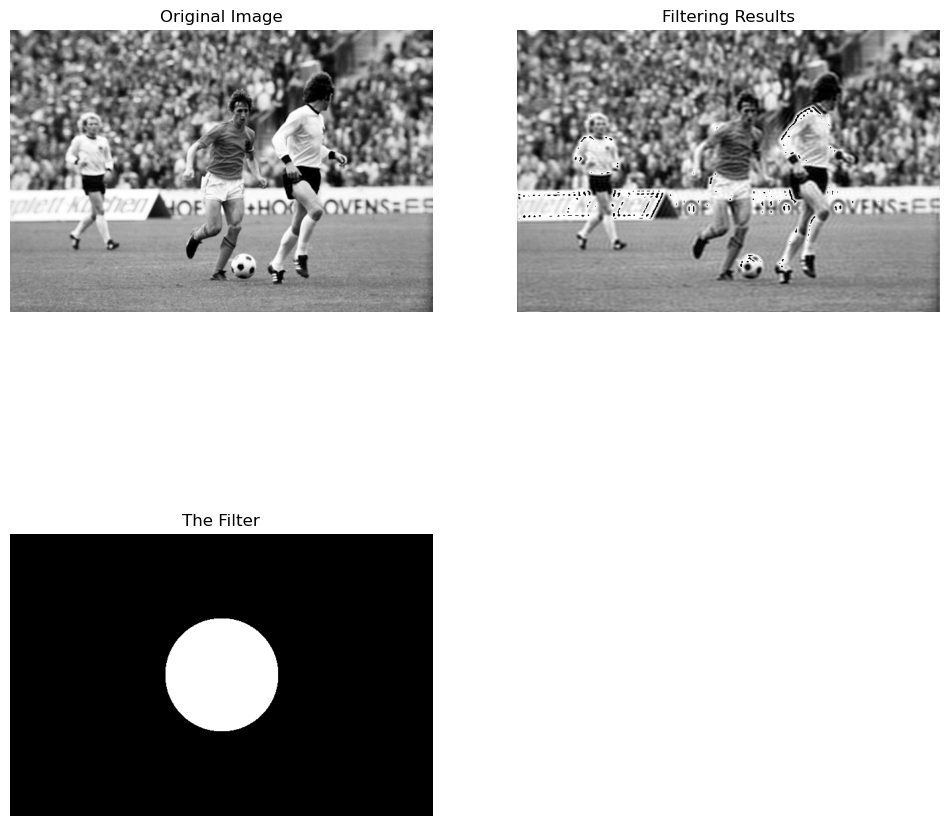

In [10]:
# inverset fft, image is back to the spatial domain, abs is necessary since the output of
# inverse fourier, ifft, is complex
#
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)

# showing the result
cv.imshow("Filtering Results",np.uint8(ifimg))
cv.imshow("Original Image",gray)

if input('Do you want to see a result+dc too?')=='y': 
    cv.imshow("Filtering Results + DC",np.uint8(ifimg))

# Draw pictures
plt.figure(figsize=(12,12))
plt.subplot(221), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')

plt.subplot(222), plt.imshow(np.uint8(ifimg), 'gray'), plt.title('Filtering Results')
plt.axis('off')

plt.subplot(223), plt.imshow(np.uint8(f * dc), 'gray'), plt.title('The Filter')
plt.axis('off')

plt.show()
cv.waitKey(0)
cv.destroyAllWindows()